# Content
### This database includes 21 variables per each of the 721 Pokémon of the first six generations, plus the Pokémon ID and its name. These variables are briefly described next:

* Number. Pokémon ID in the Pokédex.
* Name. Name of the Pokémon.
* Type_1. Primary type.
* Type_2. Second type, in case the Pokémon has it.
* Total. Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
* HP. Base Health Points.
* Attack. Base Attack.
* Defense. Base Defense.
* Sp_Atk. Base Special Attack.
* Sp_Def. Base Special Defense.
* Speed. Base Speed.
* Generation. Number of the generation when the Pokémon was introduced.
* isLegendary. Boolean that indicates whether the Pokémon is Legendary or not.
* Color. Color of the Pokémon according to the Pokédex.
* hasGender. Boolean that indicates if the Pokémon can be classified as female or male.
* Pr_male. In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
* Egg_Group_1. Egg Group of the Pokémon.
* Egg_Group_2. Second Egg Group of the Pokémon, in case it has two.
* hasMegaEvolution. Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
* Height_m. Height of the Pokémon, in meters.
* Weight_kg. Weight of the Pokémon, in kilograms.
* Catch_Rate. Catch Rate.
* Body_Style. Body Style of the Pokémon according to the Pokédex.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Libraries to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import pickle

import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  ## to plot feature importance

from sklearn.svm import SVR ## Support Vector Regressor

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score


In [2]:
df=pd.read_csv("pokemon_alopez247.csv")

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [4]:
df.shape

(721, 23)

In [5]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [6]:
df['isLegendary'].value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

In [7]:
pd.set_option('display.max_columns', 100) ## display max 100 columns
df

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Blue,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False,Blue,True,0.875,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,Green,True,0.500,Bug,NaN,False,0.30,2.9,255,insectoid


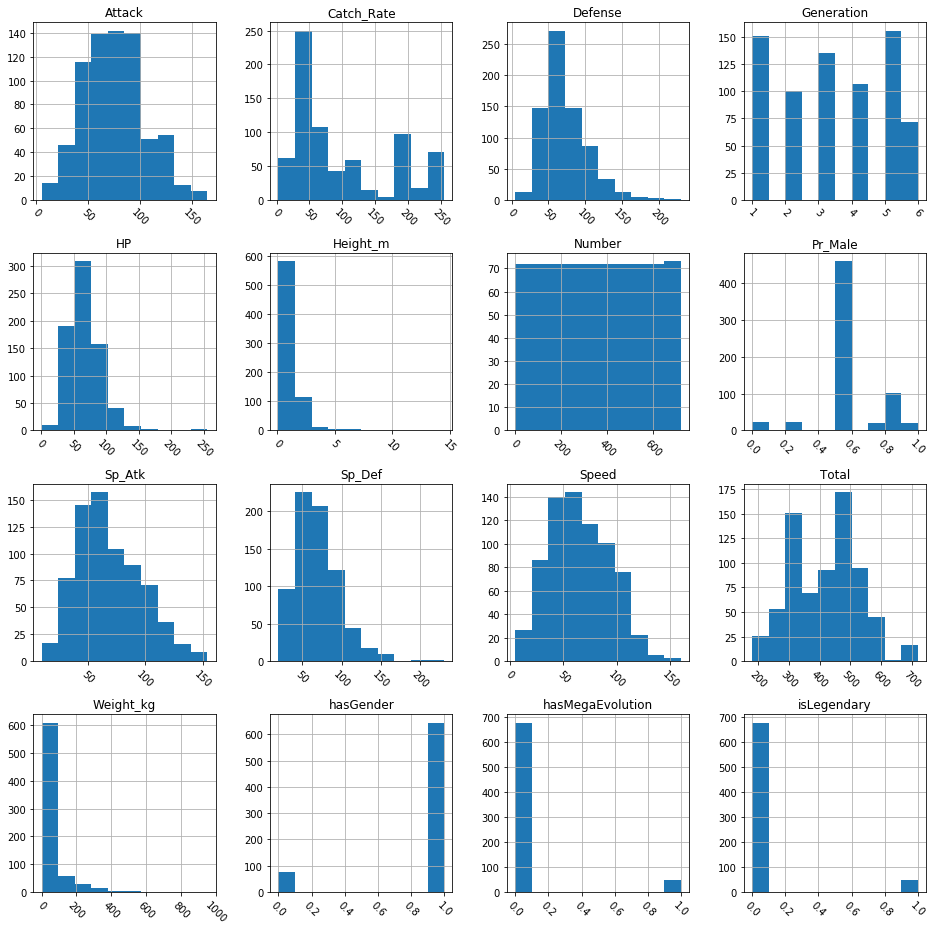

In [8]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

## Observations 
* mostly all pokemon attack range is between 50 to 100

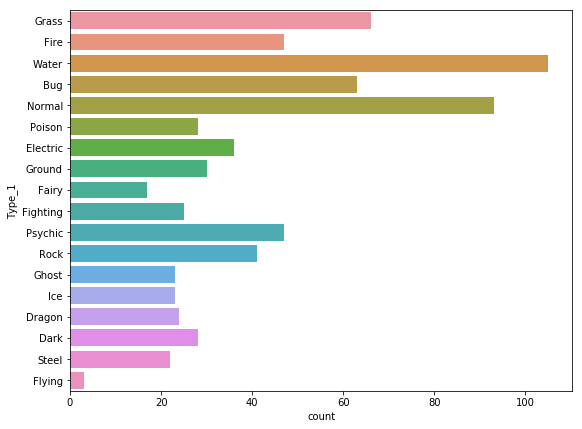

In [9]:
plt.figure(figsize=(9,7))
sns.countplot(y='Type_1', data=df)

### Ploting graph Catch rate vs isLegendary

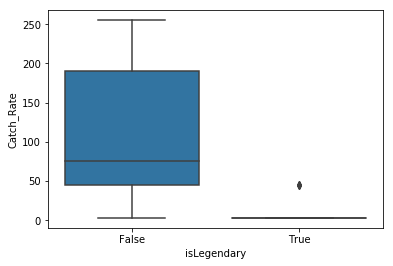

In [10]:
## Catch Rate vs isLegendary
sns.boxplot(y='Catch_Rate', x='isLegendary', data=df)

### Observation
* As catch Rate increases the chance of Legendary pokemon is less
* In table Catch Rate of Legendary pokemon is 3.

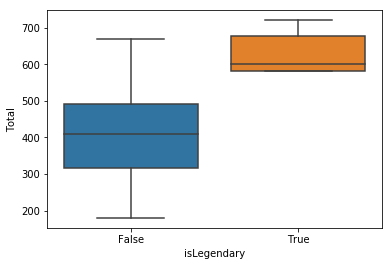

In [11]:
## Total vs isLegendary
sns.boxplot(y='Total', x='isLegendary', data=df)

### Observation
* Total (sum of HP, Attack, Defense, Sp_Atk, Sp_Def, Speed) increase chance of Legendary Pokemon increase.
* In table total for Legendary pokemon is more than 600.

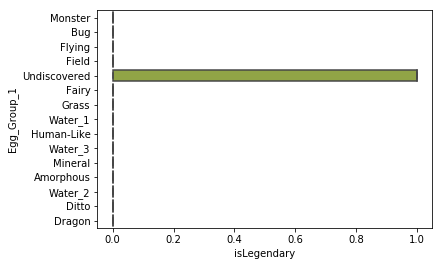

In [12]:
## Egg_Group_1 vs isLegendary
sns.boxplot(y='Egg_Group_1', x='isLegendary', data=df)

### Observation
* All Legendary pokemon's Egg group is undiscovered

In [13]:
print(df.shape)

(721, 23)


### Checking for duplicates.

In [14]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(721, 23)


### Checking unique values in isLegendary

In [15]:
print( df.isLegendary.unique() )

[False  True]


* We find there are two values i.e True or False
* So we make them as binary 0 or 1.

### Here we are dropping Egg_Group_2 and Type_2 as they are not required.

In [16]:
df=df.drop(['Type_2'],axis=1)

In [17]:
df=df.drop(['Egg_Group_2'],axis=1)

In [18]:
df

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,534,78,84,78,109,85,100,1,False,Red,True,0.875,Monster,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,314,44,48,65,50,64,43,1,False,Blue,True,0.875,Monster,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,405,59,63,80,65,80,58,1,False,Blue,True,0.875,Monster,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,530,79,83,100,85,105,78,1,False,Blue,True,0.875,Monster,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,195,45,30,35,20,20,45,1,False,Green,True,0.500,Bug,False,0.30,2.9,255,insectoid


* 1 for True (Not Legendary)
* 0 for False (Legendary)

In [19]:
def pol(x):
    if x== False:
        return 0
    else:
        return 1 
df['isLegendary']=df['isLegendary'].map(pol)
df

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,0,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,0,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,0,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,0,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,534,78,84,78,109,85,100,1,0,Red,True,0.875,Monster,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,314,44,48,65,50,64,43,1,0,Blue,True,0.875,Monster,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,405,59,63,80,65,80,58,1,0,Blue,True,0.875,Monster,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,530,79,83,100,85,105,78,1,0,Blue,True,0.875,Monster,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,195,45,30,35,20,20,45,1,0,Green,True,0.500,Bug,False,0.30,2.9,255,insectoid


### Here in Egg group we make Discovered to rest 

In [20]:
def ma(x):
    if x != 'Undiscovered':
        return 'Discovered'
    else:
        return 'Undiscovered'

df['Egg_Group_1']=df['Egg_Group_1'].map(ma)
df
    

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0,Green,True,0.875,Discovered,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,0,Green,True,0.875,Discovered,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,0,Green,True,0.875,Discovered,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,0,Red,True,0.875,Discovered,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,0,Red,True,0.875,Discovered,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,534,78,84,78,109,85,100,1,0,Red,True,0.875,Discovered,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,314,44,48,65,50,64,43,1,0,Blue,True,0.875,Discovered,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,405,59,63,80,65,80,58,1,0,Blue,True,0.875,Discovered,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,530,79,83,100,85,105,78,1,0,Blue,True,0.875,Discovered,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,195,45,30,35,20,20,45,1,0,Green,True,0.500,Discovered,False,0.30,2.9,255,insectoid


### As we find there are some sparse classes. They can cause the model to be overfit.

In [21]:
df.Type_1.replace(['Flying'], 'Bug', inplace=True)

In [22]:
df.Type_1.replace(['Dragon'], 'Fire', inplace=True)

In [23]:
df

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0,Green,True,0.875,Discovered,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,0,Green,True,0.875,Discovered,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,0,Green,True,0.875,Discovered,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,0,Red,True,0.875,Discovered,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,0,Red,True,0.875,Discovered,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,534,78,84,78,109,85,100,1,0,Red,True,0.875,Discovered,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,314,44,48,65,50,64,43,1,0,Blue,True,0.875,Discovered,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,405,59,63,80,65,80,58,1,0,Blue,True,0.875,Discovered,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,530,79,83,100,85,105,78,1,0,Blue,True,0.875,Discovered,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,195,45,30,35,20,20,45,1,0,Green,True,0.500,Discovered,False,0.30,2.9,255,insectoid


### We replace flying type with bug and Dragon with fire.

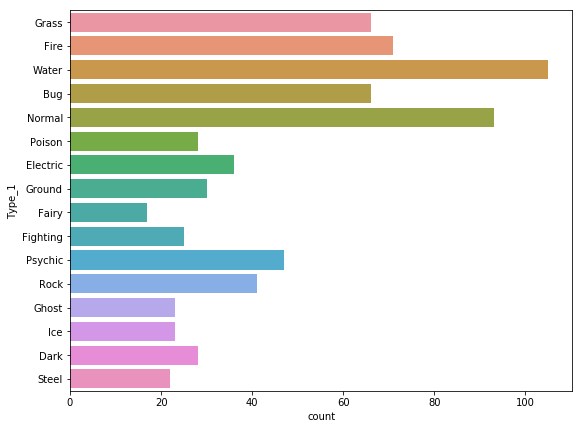

In [24]:
plt.figure(figsize=(9,7))
sns.countplot(y='Type_1', data=df)

### Displaying null values.


In [25]:
# Display number of missing values by feature
df.isnull().sum()

Number               0
Name                 0
Type_1               0
Total                0
HP                   0
Attack               0
Defense              0
Sp_Atk               0
Sp_Def               0
Speed                0
Generation           0
isLegendary          0
Color                0
hasGender            0
Pr_Male             77
Egg_Group_1          0
hasMegaEvolution     0
Height_m             0
Weight_kg            0
Catch_Rate           0
Body_Style           0
dtype: int64

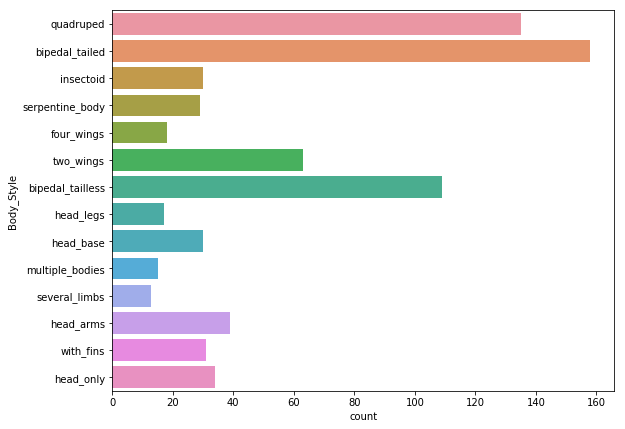

In [26]:
plt.figure(figsize=(9,7))
sns.countplot(y='Body_Style', data=df)

In [27]:
print(df.shape)

(721, 21)


### Drop Total, Height, hasMegaEvolution, Weight and Body Style

In [28]:
df=df.drop(['Total','Height_m','hasMegaEvolution','Weight_kg','Body_Style'],axis=1)

In [29]:
df.head()

,Number,Name,Type_1,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Catch_Rate
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,0,Green,True,0.875,Discovered,45
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,0,Green,True,0.875,Discovered,45
2,3,Venusaur,Grass,80,82,83,100,100,80,1,0,Green,True,0.875,Discovered,45
3,4,Charmander,Fire,39,52,43,60,50,65,1,0,Red,True,0.875,Discovered,45
4,5,Charmeleon,Fire,58,64,58,80,65,80,1,0,Red,True,0.875,Discovered,45


### One-Hot encoding for categorical variables.

In [30]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['Egg_Group_1', 'Type_1'])

# Display first 10 rows
df.head(10)

,Number,Name,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Catch_Rate,Egg_Group_1_Discovered,Egg_Group_1_Undiscovered,Type_1_Bug,Type_1_Dark,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,Type_1_Fire,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
0,1,Bulbasaur,45,49,49,65,65,45,1,0,Green,True,0.875,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,1,0,Green,True,0.875,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,1,0,Green,True,0.875,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,Charmander,39,52,43,60,50,65,1,0,Red,True,0.875,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Charmeleon,58,64,58,80,65,80,1,0,Red,True,0.875,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,6,Charizard,78,84,78,109,85,100,1,0,Red,True,0.875,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,7,Squirtle,44,48,65,50,64,43,1,0,Blue,True,0.875,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,8,Wartortle,59,63,80,65,80,58,1,0,Blue,True,0.875,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,9,Blastoise,79,83,100,85,105,78,1,0,Blue,True,0.875,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,10,Caterpie,45,30,35,20,20,45,1,0,Green,True,0.500,255,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df.tail()

,Number,Name,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Catch_Rate,Egg_Group_1_Discovered,Egg_Group_1_Undiscovered,Type_1_Bug,Type_1_Dark,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,Type_1_Fire,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
716,717,Yveltal,126,131,95,131,98,99,6,1,Red,False,NaN,45,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
717,718,Zygarde,108,100,121,81,95,95,6,1,Green,False,NaN,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
718,719,Diancie,50,100,150,100,150,50,6,1,Pink,False,NaN,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
719,720,Hoopa,80,110,60,150,130,70,6,1,Purple,False,NaN,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
720,721,Volcanion,80,110,120,130,90,70,6,1,Brown,False,NaN,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Making Gender as 1 and 0

* 1 for True (we know that pokemon gender).
* 0 for False (we dont know that pokemon gender).

In [32]:
def pol(x):
    if x== False:
        return 0
    else:
        return 1 
df['hasGender']=df['hasGender'].map(pol)
df

,Number,Name,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Catch_Rate,Egg_Group_1_Discovered,Egg_Group_1_Undiscovered,Type_1_Bug,Type_1_Dark,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,Type_1_Fire,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
0,1,Bulbasaur,45,49,49,65,65,45,1,0,Green,1,0.875,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,1,0,Green,1,0.875,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,1,0,Green,1,0.875,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,Charmander,39,52,43,60,50,65,1,0,Red,1,0.875,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Charmeleon,58,64,58,80,65,80,1,0,Red,1,0.875,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,6,Charizard,78,84,78,109,85,100,1,0,Red,1,0.875,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,7,Squirtle,44,48,65,50,64,43,1,0,Blue,1,0.875,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,8,Wartortle,59,63,80,65,80,58,1,0,Blue,1,0.875,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,9,Blastoise,79,83,100,85,105,78,1,0,Blue,1,0.875,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,10,Caterpie,45,30,35,20,20,45,1,0,Green,1,0.500,255,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Drop Pr_Male and color as it is not useful

In [33]:
df=df.drop(['Color','Pr_Male'],axis=1)

In [34]:
df.head()

,Number,Name,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Catch_Rate,Egg_Group_1_Discovered,Egg_Group_1_Undiscovered,Type_1_Bug,Type_1_Dark,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,Type_1_Fire,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
0,1,Bulbasaur,45,49,49,65,65,45,1,0,1,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,1,0,1,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,1,0,1,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,Charmander,39,52,43,60,50,65,1,0,1,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Charmeleon,58,64,58,80,65,80,1,0,1,45,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Train and Test

In [112]:
# Create separate object for target variable
y = df.isLegendary

# Create separate object for input features
X = df.drop(['isLegendary','Name','Number'], axis=1)

In [113]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.isLegendary)



In [37]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(576, 27) (145, 27) (576,) (145,)


In [38]:
train_mean = X_train.mean()
train_std = X_train.std()

### Saving pickle files

In [39]:
## Save these mean and std dev values
train_mean.to_pickle("Save/train_mean.pkl")
train_std.to_pickle("Save/train_std.pkl")

### Saving DataFrame

In [40]:
df.to_csv("pokemon_data.csv",index=None) 

### Standardize train dataset

In [41]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [42]:
## Check for mean and std dev.
X_train.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Catch_Rate,Egg_Group_1_Discovered,Egg_Group_1_Undiscovered,Type_1_Bug,Type_1_Dark,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,Type_1_Fire,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
count,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,576.000000,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02
mean,-6.322103e-17,-8.056827e-17,-1.389706e-16,-1.634495e-16,4.625929e-18,2.293690e-16,-6.707597e-17,3.238150e-17,3.623645e-17,-1.696174e-17,1.572816e-16,4.749287e-16,2.745682e-16,-1.998787e-16,-7.709882e-17,3.922403e-17,2.380426e-16,0.000000,-1.266348e-16,1.109259e-16,-8.943463e-17,1.511137e-16,-2.030590e-16,-5.107797e-17,1.624858e-16,-2.046010e-16,-6.061895e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.661399e+00,-2.362020e+00,-2.224318e+00,-2.042234e+00,-1.855373e+00,-2.240708e+00,-1.393391e+00,-2.930029e+00,-1.269705e+00,-2.957617e+00,-3.375230e-01,-3.114068e-01,-1.991036e-01,-2.342001e-01,-1.633755e-01,-2.037624e-01,-3.180605e-01,-0.179449,-3.180605e-01,-1.991036e-01,-1.845321e-01,-3.806275e-01,-1.991036e-01,-2.765908e-01,-2.463087e-01,-1.688841e-01,-4.157109e-01
25%,-7.281277e-01,-8.015144e-01,-6.929133e-01,-8.296687e-01,-7.228410e-01,-7.843646e-01,-7.912958e-01,3.407010e-01,-7.256133e-01,3.375230e-01,-3.375230e-01,-3.114068e-01,-1.991036e-01,-2.342001e-01,-1.633755e-01,-2.037624e-01,-3.180605e-01,-0.179449,-3.180605e-01,-1.991036e-01,-1.845321e-01,-3.806275e-01,-1.991036e-01,-2.765908e-01,-2.463087e-01,-1.688841e-01,-4.157109e-01
50%,-1.363099e-01,-5.518547e-02,-1.824451e-01,-1.367744e-01,-1.565751e-01,-5.619310e-02,-1.892002e-01,3.407010e-01,-3.693626e-01,3.375230e-01,-3.375230e-01,-3.114068e-01,-1.991036e-01,-2.342001e-01,-1.633755e-01,-2.037624e-01,-3.180605e-01,-0.179449,-3.180605e-01,-1.991036e-01,-1.845321e-01,-3.806275e-01,-1.991036e-01,-2.765908e-01,-2.463087e-01,-1.688841e-01,-4.157109e-01
75%,4.555079e-01,6.911435e-01,4.981791e-01,7.293434e-01,5.984460e-01,8.540213e-01,1.014991e+00,3.407010e-01,1.055640e+00,3.375230e-01,-3.375230e-01,-3.114068e-01,-1.991036e-01,-2.342001e-01,-1.633755e-01,-2.037624e-01,-3.180605e-01,-0.179449,-3.180605e-01,-1.991036e-01,-1.845321e-01,-3.806275e-01,-1.991036e-01,-2.765908e-01,-2.463087e-01,-1.688841e-01,-4.157109e-01
max,7.360049e+00,3.065826e+00,4.411768e+00,2.808026e+00,4.939818e+00,3.402622e+00,1.617087e+00,3.407010e-01,1.994846e+00,3.375230e-01,2.957617e+00,3.205658e+00,5.013791e+00,4.262441e+00,6.110243e+00,4.899157e+00,3.138597e+00,5.562929,3.138597e+00,5.013791e+00,5.409704e+00,2.622680e+00,5.013791e+00,3.609173e+00,4.052898e+00,5.910942e+00,2.401342e+00


### Standardize test dataset

In [43]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [44]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Catch_Rate,Egg_Group_1_Discovered,Egg_Group_1_Undiscovered,Type_1_Bug,Type_1_Dark,Type_1_Electric,Type_1_Fairy,Type_1_Fighting,Type_1_Fire,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,-0.014681,0.065303,0.075723,-0.036185,0.026973,-0.150102,0.026724,-0.042764,-0.049295,0.019372,-0.019372,0.052428,0.016602,-0.048132,-0.076843,-0.133377,0.111042,0.018564,-0.008153,0.088504,-0.030208,0.033622,0.016602,-0.115801,-0.009111,0.082695,-0.027152
std,1.098658,0.915215,0.986078,0.989671,1.098685,0.959457,1.029927,1.055866,0.961811,0.976581,0.976581,1.074812,1.041830,0.898682,0.734236,0.597223,1.143745,1.051418,0.990946,1.194315,0.919422,1.039213,1.041830,0.776594,0.984982,1.215091,0.974765
min,-1.911763,-2.192400,-1.884006,-2.042234,-1.666617,-2.240708,-1.393391,-2.930029,-1.269705,-2.957617,-0.337523,-0.311407,-0.199104,-0.234200,-0.163375,-0.203762,-0.318061,-0.179449,-0.318061,-0.199104,-0.184532,-0.380627,-0.199104,-0.276591,-0.246309,-0.168884,-0.415711
25%,-0.728128,-0.496198,-0.692913,-0.829669,-0.722841,-0.966408,-0.791296,0.340701,-0.725613,0.337523,-0.337523,-0.311407,-0.199104,-0.234200,-0.163375,-0.203762,-0.318061,-0.179449,-0.318061,-0.199104,-0.184532,-0.380627,-0.199104,-0.276591,-0.246309,-0.168884,-0.415711
50%,-0.333582,0.012663,-0.012289,-0.136774,-0.156575,-0.238236,-0.189200,0.340701,-0.531295,0.337523,-0.337523,-0.311407,-0.199104,-0.234200,-0.163375,-0.203762,-0.318061,-0.179449,-0.318061,-0.199104,-0.184532,-0.380627,-0.199104,-0.276591,-0.246309,-0.168884,-0.415711
75%,0.416053,0.589371,0.668335,0.556120,0.598446,0.489936,1.014991,0.340701,0.336661,0.337523,-0.337523,-0.311407,-0.199104,-0.234200,-0.163375,-0.203762,-0.318061,-0.179449,-0.318061,-0.199104,-0.184532,-0.380627,-0.199104,-0.276591,-0.246309,-0.168884,-0.415711
max,4.795505,2.896206,5.432705,2.946605,6.072349,2.310364,1.617087,0.340701,1.994846,0.337523,2.957617,3.205658,5.013791,4.262441,6.110243,4.899157,3.138597,5.562929,3.138597,5.013791,5.409704,2.622680,5.013791,3.609173,4.052898,5.910942,2.401342


# Machine Learning Models

## Model 1 :- Logistic Regression

In [45]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [46]:
model.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [48]:
## Predict Test set results
y_pred = model.predict(X_test)

### Prediction for true class i.e. for legendary

In [49]:
# Get just the prediction for the True class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [50]:
# Display first 10 predictions
y_pred_proba[0:10]

array([2.57436058e-08, 1.87523316e-11, 1.74374659e-11, 1.55094738e-14,
       2.92215188e-18, 1.67433146e-21, 4.46851546e-30, 7.60929869e-12,
       5.23129424e-18, 5.52675986e-22])

### The values in first 10 predictions are 0 

In [51]:
i=36 ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 36, actual class = 1, precited class = 1, predicted probability = 0.9999999999625611


### As actual class is 1 and our model predicted is also 1 

In [52]:
y_test.describe()

count    145.000000
mean       0.062069
std        0.242117
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: isLegendary, dtype: float64

### As here max is 1 and min is 0 that means after random split in y test we have 0 and 1 present.


### Confusion matrix

In [53]:
confusion_matrix(y_test, y_pred).T

array([[135,   1],
       [  1,   8]], dtype=int64)

In [54]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

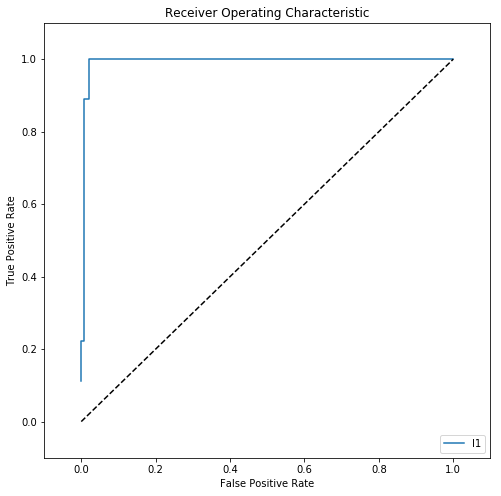

In [55]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

1.0


In [57]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9926470588235293


In [58]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=10, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Attack
Egg_Group_1_Discovered
Egg_Group_1_Undiscovered
Type_1_Normal
Catch_Rate
HP
Sp_Def
hasGender
Defense
Type_1_Psychic
Type_1_Fire
Type_1_Water
Type_1_Grass
Type_1_Bug
Generation
Type_1_Ice
Type_1_Dark
Type_1_Fairy
Speed
Type_1_Electric
Type_1_Ground
Type_1_Ghost
Type_1_Poison
Type_1_Fighting
Type_1_Rock
Sp_Atk
Type_1_Steel


### Model 2 :- Random Forest Regression

In [60]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [61]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
y_train_pred = model.predict(X_train)

In [63]:
y_pred = model.predict(X_test)

In [64]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [65]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.00834296, 0.00057692, 0.00608661, 0.        , 0.        ,
       0.00055556, 0.        , 0.0445913 , 0.00337099, 0.        ])

In [66]:
confusion_matrix(y_test, y_pred).T

array([[135,   0],
       [  1,   9]], dtype=int64)

In [67]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

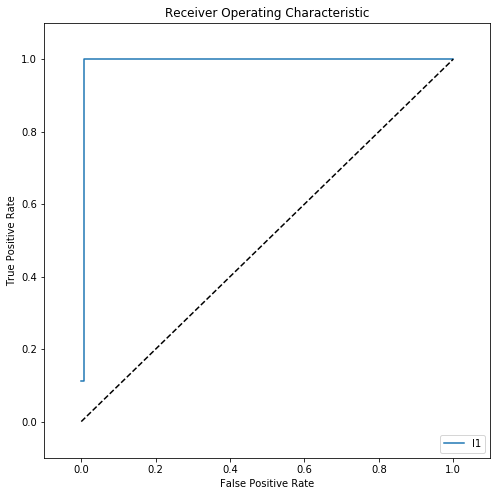

In [68]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.9962894248608534

In [70]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9934640522875816


In [71]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Catch_Rate
Egg_Group_1_Discovered
Egg_Group_1_Undiscovered
hasGender
Sp_Atk
Sp_Def
Attack
Defense
HP
Speed
Generation
Type_1_Psychic
Type_1_Steel
Type_1_Normal
Type_1_Fire
Type_1_Water
Type_1_Rock
Type_1_Dark
Type_1_Ground
Type_1_Fighting
Type_1_Bug
Type_1_Electric
Type_1_Ice
Type_1_Fairy
Type_1_Grass
Type_1_Ghost
Type_1_Poison


### Model 3 :- XGBoost Regression


In [73]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=15, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [74]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [75]:
y_train_pred = model.predict(X_train)

In [76]:
y_pred = model.predict(X_test)

In [77]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [78]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.00173496, 0.00088539, 0.00143331, 0.00068109, 0.00073451,
       0.00076211, 0.00073451, 0.0060116 , 0.00266266, 0.00068109],
      dtype=float32)

In [79]:
confusion_matrix(y_test, y_pred).T

array([[135,   0],
       [  1,   9]], dtype=int64)

In [80]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

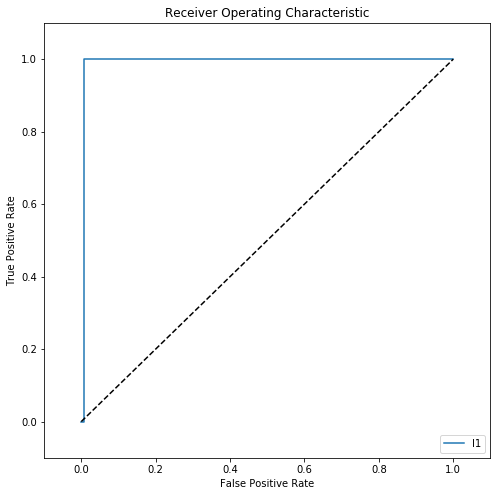

In [81]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

1.0

In [83]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9926470588235294


In [84]:
model = XGBClassifier(max_depth=5,learning_rate=0.05,n_estimators=300, reg_lambda=10)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [85]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

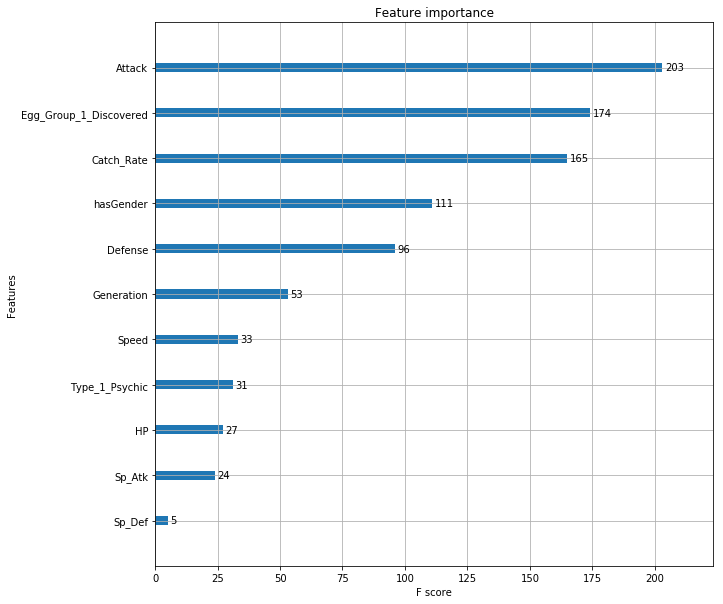

In [86]:
my_plot_importance(model, (10,10))

### Model 5 :- SVM

In [87]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [88]:
model.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
## Building the model again with the best hyperparameters
model = SVR(C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [90]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [91]:
## Predict Test results
y_pred = model.predict(X_test)

In [92]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names =df.drop(['isLegendary','Name','Number'], axis=1)
model = SVR(C=10, gamma=0.01)
model.fit(X_train, y_train)
f_importances(model.coef_, features_names)

AttributeError: coef_ is only available when using a linear kernel

### Model 6 :- K Nearest Neighbor

In [93]:
s = StandardScaler()
X = s.fit_transform(X)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [95]:
# creating odd list of K for KNN
neighbors = list(range(1,50))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 35.


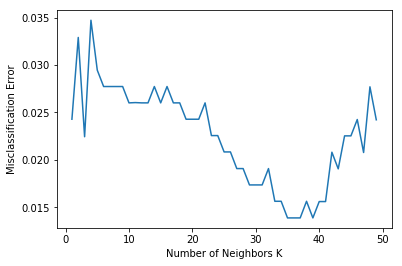

In [96]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [97]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

In [98]:
y_pred = classifier.predict(X_test)

In [99]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [100]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.        , 0.        , 0.34285714, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [101]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

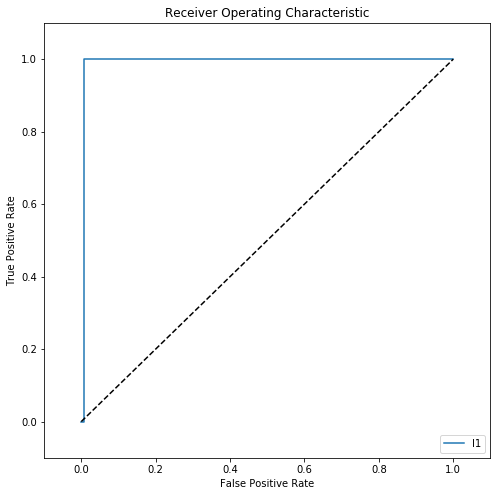

In [102]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.5123602266459409

In [104]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9926470588235294


In [105]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

In [106]:
indices = np.argsort(-classifier.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

### Model 7 :- Naive Bayes

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=df.isLegendary)


The optimal value of alpha is0.2


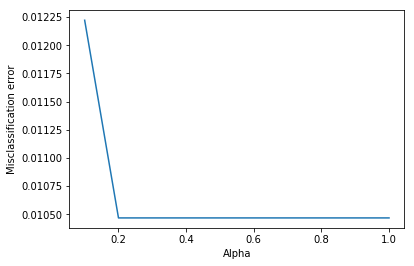

In [108]:
alpha= np.linspace(0.1,1,10)
cv_scores=[]

for a in alpha:
    clf=BernoulliNB(alpha=a)
    scores=cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

MSE=[1 - x for x in cv_scores]

optimal_alpha= alpha[MSE.index(min(MSE))]
print('\nThe optimal value of alpha is{}'.format(optimal_alpha))

plt.plot(alpha,MSE)
plt.xlabel('Alpha')
plt.ylabel('Misclassification error')
plt.show()
    

In [109]:
clf=BernoulliNB(alpha=optimal_alpha)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(y_test,y_pred).T

99.3103448275862


array([[135,   0],
       [  1,   9]], dtype=int64)

In [114]:
indices = np.argsort(-clf.feature_log_prob_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature,"\n")

The features in order of importance are:
--------------------------------------------------
['Egg_Group_1_Discovered', 'hasGender', 'Generation', 'Attack', 'Speed', 'Sp_Def', 'HP', 'Sp_Atk', 'Catch_Rate', 'Defense', 'Type_1_Water', 'Type_1_Normal', 'Type_1_Grass', 'Type_1_Fire', 'Type_1_Bug', 'Type_1_Psychic', 'Type_1_Rock', 'Type_1_Electric', 'Egg_Group_1_Undiscovered', 'Type_1_Poison', 'Type_1_Fighting', 'Type_1_Dark', 'Type_1_Ghost', 'Type_1_Ice', 'Type_1_Ground', 'Type_1_Steel', 'Type_1_Fairy'] 

['Egg_Group_1_Undiscovered', 'Sp_Atk', 'Sp_Def', 'HP', 'Attack', 'Speed', 'Defense', 'Generation', 'Type_1_Fire', 'Type_1_Psychic', 'hasGender', 'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water', 'Type_1_Ice', 'Type_1_Normal', 'Type_1_Fairy', 'Type_1_Bug', 'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground', 'Type_1_Dark', 'Type_1_Electric', 'Type_1_Fighting', 'Type_1_Poison', 'Egg_Group_1_Discovered', 'Catch_Rate'] 



### Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model3 = DecisionTreeClassifier(criterion = "gini", random_state = 123,
                               max_depth=3, min_samples_leaf=5)
model3.fit(X_train, y_train)

In [ ]:
y_pred = model3.predict(X_test)
y_pred

In [ ]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc